# Importing Modules

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from pathlib import Path



# Data

## Read Data

In [22]:
BASE_DIR = Path.cwd().parent
data_path = BASE_DIR / "data" / "car data.csv"
df = pd.read_csv(data_path)

## Show Data

In [23]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [24]:
df.shape

(301, 9)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [26]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [27]:
columns = ['Year', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

for col in columns:
    print(f"\nColumn: {col}")
    print("Unique values:")
    print(df[col].unique())

    print("Value counts:")
    print(df[col].value_counts())



Column: Year
Unique values:
[2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]
Value counts:
Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2005     4
2006     4
2007     2
2003     2
2018     1
2004     1
Name: count, dtype: int64

Column: Fuel_Type
Unique values:
['Petrol' 'Diesel' 'CNG']
Value counts:
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

Column: Seller_Type
Unique values:
['Dealer' 'Individual']
Value counts:
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

Column: Transmission
Unique values:
['Manual' 'Automatic']
Value counts:
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

Column: Owner
Unique values:
[0 1 3]
Value counts:
Owner
0    290
1     10
3      1
Name: count, dtype: int64


# Preprocessing

## Encoding Categorical Data

In [28]:

for col in ['Fuel_Type', 'Seller_Type', 'Transmission']:
    df[col] = LabelEncoder().fit_transform(df[col])


In [29]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


## Split Data

In [30]:
X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = df['Selling_Price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Evaluate Model

In [31]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
training_data_prediction = lin_reg_model.predict(x_train)

In [33]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R^2 Error : ", error_score)

R^2 Error :  0.8839793496750801


# Show Result of prediction

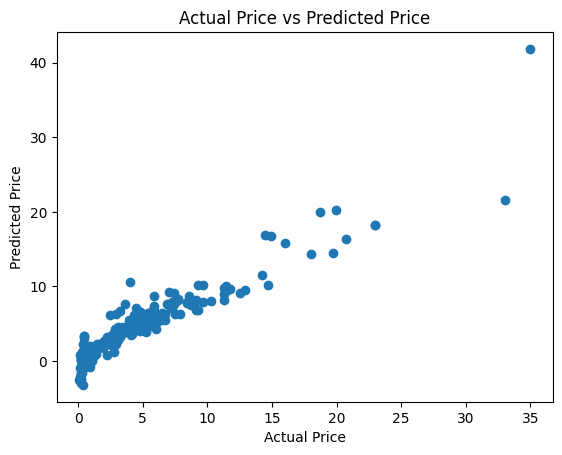

In [34]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.savefig(r'D:\Lifely_Projects\DATA\ML Projects\07 - Car Price Prediction\Images/Linear train data Actual Price vs Predicted Price.png')
plt.show()

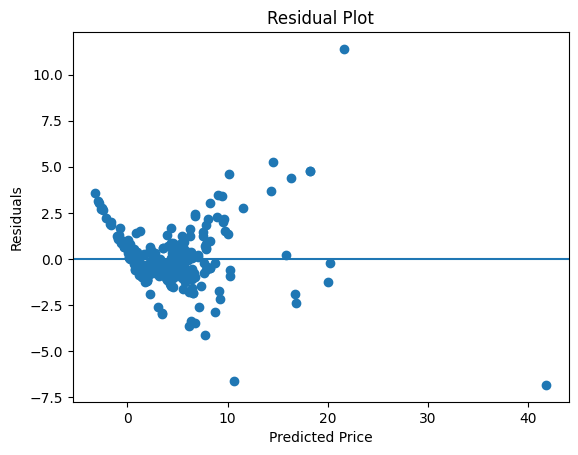

In [35]:
residuals = y_train - training_data_prediction

plt.scatter(training_data_prediction, residuals)
plt.axhline(0)
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.savefig(r'D:\Lifely_Projects\DATA\ML Projects\07 - Car Price Prediction\Images/Linear train data Residual Plot.png')
plt.show()


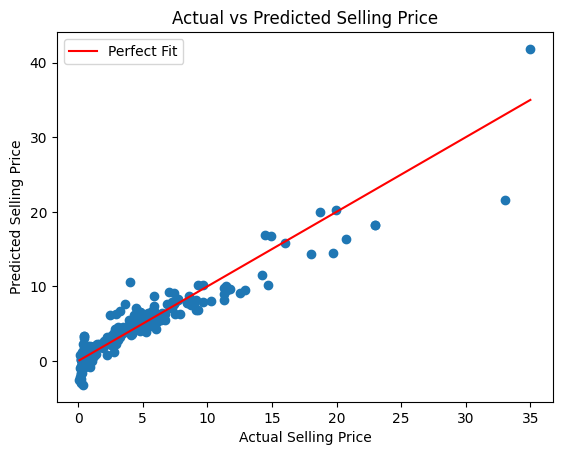

In [36]:
plt.scatter(y_train, training_data_prediction)
plt.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()],
         color='r', label='Perfect Fit')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.savefig(r'D:\Lifely_Projects\DATA\ML Projects\07 - Car Price Prediction\Images/Linear model Actual Price vs Predicted Price.png')
plt.legend()
plt.show()


In [37]:
test_data_prediction = lin_reg_model.predict(x_test)


In [38]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R^2 Error : ", error_score)

R^2 Error :  0.8468053957654174


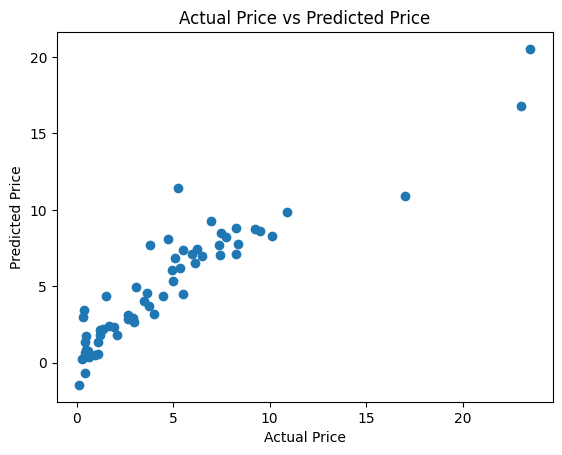

In [39]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.savefig(r'D:\Lifely_Projects\DATA\ML Projects\07 - Car Price Prediction\Images/Linear test data Actual Price vs Predicted Price.png')
plt.show()

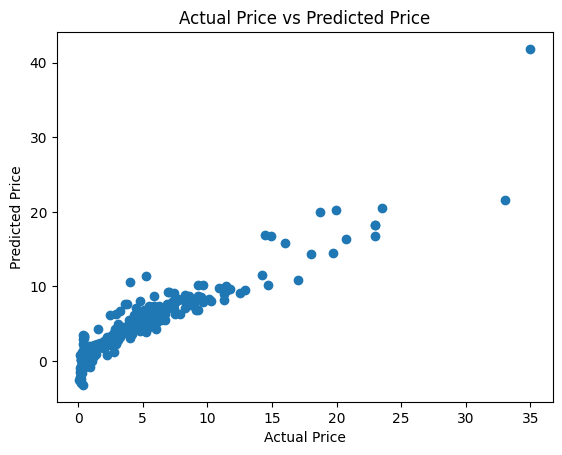

In [40]:
data_prediction = lin_reg_model.predict(X)
plt.scatter(Y, data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.savefig(r'D:\Lifely_Projects\DATA\ML Projects\07 - Car Price Prediction\Images/Linear all data Actual Price vs Predicted Price.png')
plt.show()